# 主成分分析

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 訓練データ生成

In [0]:
n_sample = 100

def gen_data(n_sample):
    mean = [0, 0]
    cov = [[2, 0.7], [0.7, 1]]
    return np.random.multivariate_normal(mean, cov, n_sample)

def plt_data(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

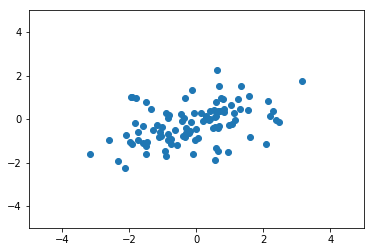

In [3]:
X = gen_data(n_sample)
plt_data(X)

## 学習

訓練データ$X = [\boldsymbol{x}_{1}, \boldsymbol{x}_{2}, ..., \boldsymbol{x}_{n}]^{\mathrm{T}}$に対して$\mathbb{E}[\boldsymbol{x}] = \boldsymbol{0}$となるように変換する。

すると、不偏共分散行列は$Var[\boldsymbol{x}] = \frac{1}{n-1} X^{\mathrm{T}}X$と書ける。

$Var[\boldsymbol{x}]$を固有値分解し、固有値の大きい順に対応する固有ベクトルを第1主成分($\boldsymbol{w}_{1}$), 第2主成分($\boldsymbol{w}_{2}$), ...とよぶ。

In [0]:
n_components=2

def get_moments(X):
    mean = X.mean(axis=0)
    stan_cov = np.dot((X - mean).T, X - mean) / (len(X) - 1)
    return mean, stan_cov
    
def get_components(eigenvectors, n_components):
#     W = eigenvectors[:, -n_components:]
#     return W.T[::-1]
    W = eigenvectors[:, ::-1][:, :n_components]
    return W.T

def plt_result(X, first, second):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    # 第１主成分
    plt.quiver(0, 0, first[0], first[1], width=0.01, scale=6, color='red')
    # 第２主成分
    plt.quiver(0, 0, second[0], second[1], width=0.01, scale=6, color='green')

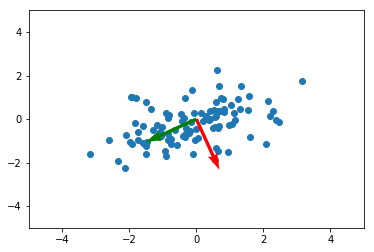

In [5]:
#分散共分散行列を標準化
meean, stan_cov = get_moments(X)
#固有値と固有ベクトルを計算
eigenvalues, eigenvectors = np.linalg.eigh(stan_cov)
components = get_components(eigenvectors, n_components)

plt_result(X, eigenvectors[0, :], eigenvectors[1, :])

## 変換（射影）

元のデータを$m$次元に変換(射影)するときは行列$W$を$W=[\boldsymbol{w}_{1}, \boldsymbol{w}_{2}, \cdots, \boldsymbol{w}_{m}]$とし、データ点$\boldsymbol{x}$を$\boldsymbol{z} = W^{\mathrm{T}} \boldsymbol{x}$によって変換(射影)する。

よって、データ$X$に対しては$Z = X^{\mathrm{T}}W$によって変換する。

In [0]:
def transform_by_pca(X, pca):
    mean = X.mean(axis=0)
    return np.dot(X-mean, components)

(-5, 5)

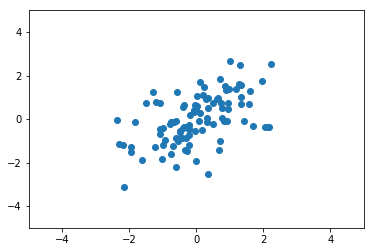

In [7]:
Z = transform_by_pca(X, components.T)
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## 逆変換

射影されたデータ点$\boldsymbol{z}$を元のデータ空間へ逆変換するときは$\bar{\boldsymbol{x}} = (W^{\mathrm{T}})^{-1} \boldsymbol{z} = W \boldsymbol{z}$によって変換する。

よって、射影されたデータ$Z$に対しては$\bar{X} = ZW^{\mathrm{T}}$によって変換する。

In [0]:
mean = X.mean(axis=0)
X_ = np.dot(Z, components.T) + mean

(-5, 5)

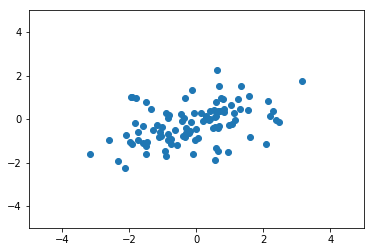

In [9]:
plt.scatter(X_[:, 0], X_[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
print('components: {}'.format(pca.components_))
print('mean: {}'.format(pca.mean_))
print('covariance: {}'.format(pca.get_covariance())) 

components: [[ 0.90995176  0.41471412]
 [-0.41471412  0.90995176]]
mean: [-0.1077122  -0.21705727]
covariance: [[1.60339432 0.47439589]
 [0.47439589 0.77869862]]


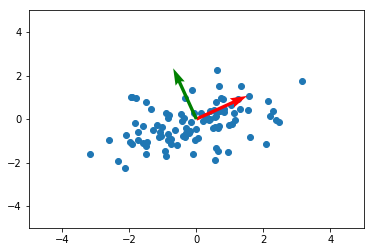

In [12]:
plt_result(X, pca.components_[0, :], pca.components_[1, :])

components: [[ 0.90995176  0.41471412]
 [-0.41471412  0.90995176]]
mean: [-0.1077122  -0.21705727]
covariance: [[1.60339432 0.47439589]
 [0.47439589 0.77869862]]


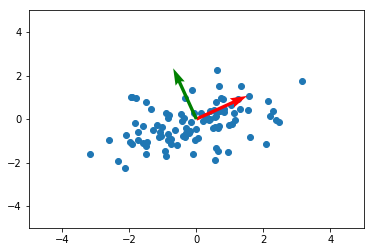

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
plt_result(X, pca.components_[0, :], pca.components_[1, :])

print('components: {}'.format(pca.components_))
print('mean: {}'.format(pca.mean_))
print('covariance: {}'.format(pca.get_covariance()))
